# **1. Data Loading, Validation, and Merging**

In [211]:
from google.colab import drive
drive.mount('/content/drive')

url1 = '/content/drive/My Drive/CIS 5570 Project/Big Data Project Material/Project Data/Health_and_Personal_Care.jsonl.gz'

url2 =  '/content/drive/My Drive/CIS 5570 Project/Big Data Project Material/Project Data/meta_Health_and_Personal_Care.jsonl.gz'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
!pip install numpy==1.24.3

In [213]:
!pip install scikit-surprise

In [214]:
import pandas as pd
import numpy as np
# from scipy.sparse import csr_matrix
# from sklearn.neighbors import NearestNeighbors
from surprise import KNNWithMeans
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import requests
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split


In [215]:
# # url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Health_and_Personal_Care.jsonl.gz'
# # url2 = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/meta_categories/meta_Health_and_Personal_Care.jsonl.gz'


# # Make the request
# response = requests.get(url, allow_redirects=True)
# response2 = requests.get(url2, allow_redirects=True)
# # Check content type
# print('Content-Type:', response.headers.get('Content-Type'))
# print('Content-Type:', response2.headers.get('Content-Type'))
# # Check the beginning of the content to ensure it's not HTML
# print(response.content[:100])
# print(response2.content[:100])

# # If the content type and content check out, save the file
# if response.headers.get('Content-Type') in ['application/gzip', 'application/x-gzip']:
#     with open('Health_and_Personal_Care.jsonl.gz', 'wb') as f:
#         f.write(response.content)
#     print("File downloaded and saved!")
# else:
#     print("The downloaded content is not a gzip file.")

# #for file 2
# if response2.headers.get('Content-Type') in ['application/gzip', 'application/x-gzip']:
#     with open('Health_and_Personal_Care_metadata.jsonl.gz', 'wb') as f:
#         f.write(response2.content)
#     print("File downloaded and saved!")
# else:
#     print("The downloaded content is not a gzip file.")

In [216]:
file_path = 'Health_and_Personal_Care.jsonl.gz'

# Read the .jsonl.gz file directly into a DataFrame
with gzip.open(url1, 'rt', encoding='utf-8') as file:
    data = pd.read_json(file, lines=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             494121 non-null  int64         
 1   title              494121 non-null  object        
 2   text               494121 non-null  object        
 3   images             494121 non-null  object        
 4   asin               494121 non-null  object        
 5   parent_asin        494121 non-null  object        
 6   user_id            494121 non-null  object        
 7   timestamp          494121 non-null  datetime64[ns]
 8   helpful_vote       494121 non-null  int64         
 9   verified_purchase  494121 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 34.4+ MB
None


In [217]:
# Validate data, ensure 'rating' is between 1 and 5 by confirming the Non-Null Count is same as the old df
data = data[(data['rating'] >= 1) & (data['rating'] <= 5)]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             494121 non-null  int64         
 1   title              494121 non-null  object        
 2   text               494121 non-null  object        
 3   images             494121 non-null  object        
 4   asin               494121 non-null  object        
 5   parent_asin        494121 non-null  object        
 6   user_id            494121 non-null  object        
 7   timestamp          494121 non-null  datetime64[ns]
 8   helpful_vote       494121 non-null  int64         
 9   verified_purchase  494121 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 34.4+ MB
None


In [218]:
file_path2 = 'Health_and_Personal_Care_metadata.jsonl.gz'

# Read the .jsonl.gz file directly into a DataFrame
with gzip.open(url2, 'rt', encoding='utf-8') as file:
    df_meta = pd.read_json(file, lines=True)

print(df_meta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   title            60293 non-null  object 
 2   average_rating   60293 non-null  float64
 3   rating_number    60293 non-null  int64  
 4   features         60293 non-null  object 
 5   description      60293 non-null  object 
 6   price            10536 non-null  float64
 7   images           60293 non-null  object 
 8   videos           60293 non-null  object 
 9   store            57947 non-null  object 
 10  categories       60293 non-null  object 
 11  details          60293 non-null  object 
 12  parent_asin      60293 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 6.4+ MB
None


In [219]:
#Validation: Ensure no uplicate parent_asin is in meta data
unique_row_df2 = df_meta.drop_duplicates(subset=['parent_asin'])
print(unique_row_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   title            60293 non-null  object 
 2   average_rating   60293 non-null  float64
 3   rating_number    60293 non-null  int64  
 4   features         60293 non-null  object 
 5   description      60293 non-null  object 
 6   price            10536 non-null  float64
 7   images           60293 non-null  object 
 8   videos           60293 non-null  object 
 9   store            57947 non-null  object 
 10  categories       60293 non-null  object 
 11  details          60293 non-null  object 
 12  parent_asin      60293 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 6.4+ MB
None


In [220]:
merged_df = pd.merge(data, unique_row_df2, on='parent_asin', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             494121 non-null  int64         
 1   title_x            494121 non-null  object        
 2   text               494121 non-null  object        
 3   images_x           494121 non-null  object        
 4   asin               494121 non-null  object        
 5   parent_asin        494121 non-null  object        
 6   user_id            494121 non-null  object        
 7   timestamp          494121 non-null  datetime64[ns]
 8   helpful_vote       494121 non-null  int64         
 9   verified_purchase  494121 non-null  bool          
 10  main_category      494121 non-null  object        
 11  title_y            494121 non-null  object        
 12  average_rating     494121 non-null  float64       
 13  rating_number      494121 non-null  int64   

# **2. Data Exploration**

In [221]:
#Number of unique users
print("Count of unique user_ids: ",merged_df['user_id'].nunique())

Count of unique user_ids:  461656


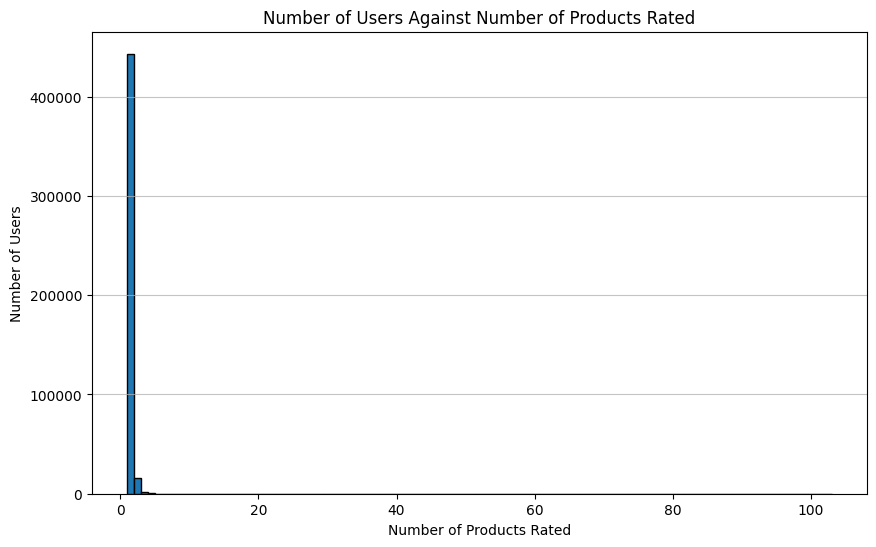

In [222]:
user_product_counts = merged_df.groupby('user_id')['parent_asin'].nunique()

# Plot the number of users against the number of products they rated
plt.figure(figsize=(10, 6))
plt.hist(user_product_counts, bins=range(1, user_product_counts.max() + 2), edgecolor='black')
plt.xlabel('Number of Products Rated')
plt.ylabel('Number of Users')
plt.title('Number of Users Against Number of Products Rated')
plt.grid(axis='y', alpha=0.75)
plt.show()

From the plot above, you can see that most users have rated minimal number of items.

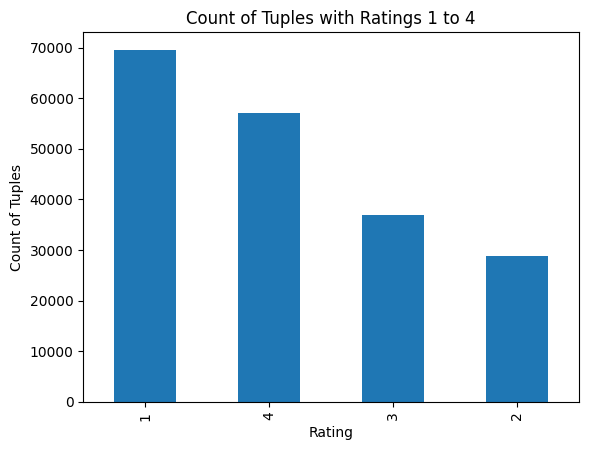

In [223]:
filtered_df = merged_df[merged_df['rating'].isin([1, 2, 3, 4])]

# Count the occurrences of each rating
rating_counts = filtered_df['rating'].value_counts()

# Plot the counts
rating_counts.plot(kind='bar', xlabel='Rating', ylabel='Count of Tuples', title='Count of Tuples with Ratings 1 to 4')
plt.show()

In [224]:
count= len(filtered_df)
print("Number of tuples with ratings of 1, 2, 3 , 4: ", count)

Number of tuples with ratings of 1, 2, 3 , 4:  192408


Most of the ratings in the dataset are below 5, which add up to 192408 tuples. For this reduced data approach, we will consider only ratings greater than 4.

In [225]:
#Drop tuples with a ratings between 1 and 4
indices_to_drop = filtered_df.index
reduced_df = merged_df.drop(indices_to_drop)

num_rows, num_columns = reduced_df.shape
print("Reduced dataset size after dropping low ratings:", num_rows)

Reduced dataset size after dropping low ratings: 301713


Tuples with low ratings are dropped since we're only interested in high ratings.

data was reduced by 38.93% ~ 40%, from 494,121 to 301,713.

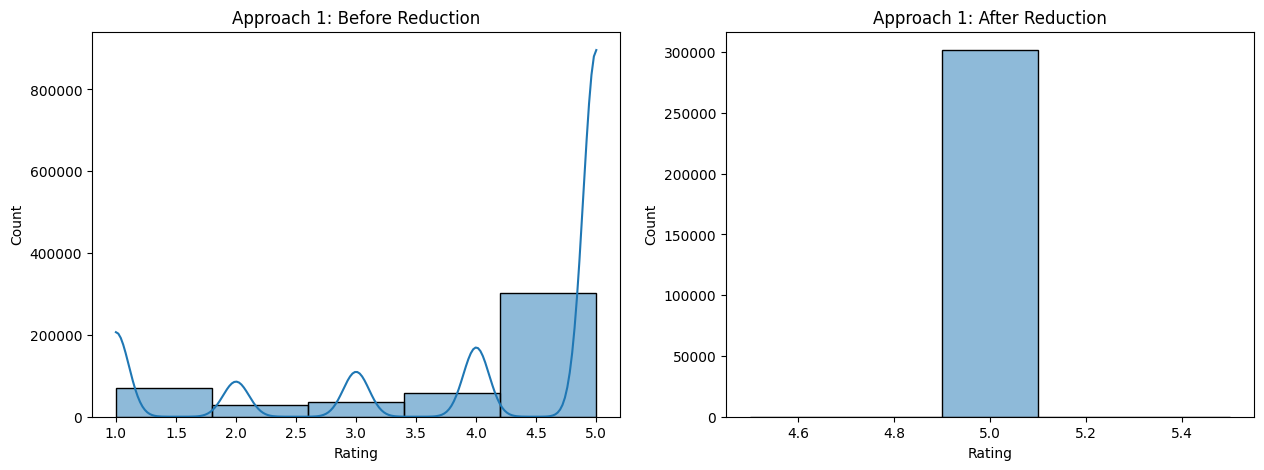

In [226]:
# Visualize the Rating distribution before and after dropping values with ratings equal to 4 or less
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before reduction
axes[0].set_title('Approach 1: Before Reduction')
sns.histplot(merged_df['rating'], bins=5, kde=True, ax=axes[0])
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# After reduction
axes[1].set_title('Approach 1: After Reduction')
sns.histplot(reduced_df['rating'], bins=5, kde=True, ax=axes[1])
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')

plt.show()




In [227]:
#Number of unique users
print("Count of unique user_ids after data reduction: ",reduced_df['user_id'].nunique())

Count of unique user_ids after data reduction:  285354


*Number* of unique user_ids after data reduction dropped by 38.16%, from 461,656 to 285,354 users.

In [228]:
user_rating_counts = reduced_df.groupby('user_id').size() #Gives me the number of ratings by each user

users_grouped_by_rating_count = user_rating_counts.groupby(user_rating_counts).size() #Groups users who rated once, twice, ...

print("Ratings count, users_ids count: \n \n",users_grouped_by_rating_count)

Ratings count, users_ids count: 
 
 1     273276
2      10338
3       1080
4        298
5        109
6         80
7         41
8         25
9         15
10        16
11        12
12         3
13        11
14         8
15         2
16         3
17         2
18         2
19         5
20         2
21         1
22         4
24         2
25         1
26         1
27         2
29         1
30         5
31         1
32         2
35         2
40         1
47         1
57         1
66         1
dtype: int64


In [229]:
users_rated_L10 = users_grouped_by_rating_count[users_grouped_by_rating_count.index < 10]

total_sum = 0

# Loop through the index and value pairs
for index, value in users_rated_L10.items():
    total_sum += index * value
print("Number of tuples with users who rated less than 10 times: ", total_sum)

Number of tuples with users who rated less than 10 times:  300031


Number of tuples with users who rated less than 10 times resembles 99.4% of the reduced data

In [230]:
# Filter out users who rated more than 10 times
users_count_more_than_10 = users_grouped_by_rating_count[users_grouped_by_rating_count.index > 10]

total_sum = 0

# Loop through the index and value pairs
for index, value in users_count_more_than_10.items():
    total_sum += index * value

print("Sum of tuples with users who rated more than 10 times: ", total_sum)

Sum of tuples with users who rated more than 10 times:  1522


NUmber of tuples with users who rated 4 times or more resembles 0.5% of the reduced data

In [231]:
#Checkpoint
users_rated_more_than_10 = user_rating_counts[user_rating_counts > 10]

# Get the user IDs of users who rated more than 10 times
user_ids_rated_10 = users_rated_more_than_10.index.tolist()

print(user_ids_rated_10)

['AE5ESL52LWWBJTSFOAXSFZA3XCGQ', 'AEAT2QOOIXWFLBQESCVLAVXLK3RQ', 'AEAXAJACFMXIAAH4WOHRMXPSZWFA', 'AEC6IZVI2NGFBCIYVD4X5MDGB6DQ_1', 'AEC6IZVI2NGFBCIYVD4X5MDGB6DQ_2', 'AECUQNTYGADM6XKCDKWEJPDQGNVQ', 'AEHWKRPNWNMOAJSMO2F6O7RFRTNA', 'AELHYMCYVS6T35HA3UH5UGFWTK6Q', 'AENZZ2OL3KD4VQOU7JHYH42G5B7A', 'AEOK4TQIKGO23SJKZ6PW4FETNNDA_1', 'AEULD6UDDD7XSH2HXR2L6TNRHSNQ', 'AEYKTZXAWOPJG5MGGMKBLRJR6Q3A_1', 'AEYKTZXAWOPJG5MGGMKBLRJR6Q3A_2', 'AEYVPPWR4CIKWX4BGYKCBCDL2CZQ', 'AF2BLE54TEMGZ546U763ZHZRXC4A', 'AF4UB2PGVLHK45WF7I6OED36OQDA', 'AF5LHZNYDAYSIO3ICRMFGB6M4BFA', 'AF7D2XXF5YXIZNRFVXI2SLWSIEHA', 'AFF6DS6NOWRIF2AROFASUVVOPYLA', 'AFFXGMCHCCIZGDFAO26R5JT5EUXA', 'AFGCJIO7DNVCCZPG4KVMKKXVPJLQ', 'AFJBKPK5W56XWSNPQU2WW66ISWYQ', 'AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1', 'AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_2', 'AFLKX7ZNVK2DN6LG3EAP6ZNYUFHA', 'AFPPNF3RSFMMNC5UAM6V4B475MBQ', 'AFQQQ5LGNSQUEBGDCYBAZZE5T3DA', 'AFSHXT5PTGDSFW2725SDXIE6ZVEA', 'AFTJ7XQN2EIELHARUBBL6Y7L65DA', 'AFVOZ4UNUZKEQ7GTQ3IHQY7PZ5FA_1', 'AFWXGBLWDOZWCYWACBUAIS

In [232]:
# Select tuples with user IDs with more than 10 ratings
reduced_df2 = reduced_df[reduced_df['user_id'].isin(user_ids_rated_10)]

print("Further reduced dataset size after dropping users who rated less than 10 times:", reduced_df2.shape[0])

Further reduced dataset size after dropping users who rated less than 10 times: 1522


In [233]:
reduced_df2

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
99,5,Great for nose hair,Great little trimmer for nose hair and also ot...,[],B09X36R9SM,B09X36R9SM,AFJBKPK5W56XWSNPQU2WW66ISWYQ,2022-09-06 23:29:21.247,1,False,...,82,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Love all the accessories!', 'url':...",KoTuosy,[],{'Recommended Uses For Product': 'Hair Removal...,NaN
100,5,Helps with my workouts,I like taking Ashwagandha as I find it helps m...,[],B09KYF759M,B09KYF759M,AFJBKPK5W56XWSNPQU2WW66ISWYQ,2022-05-05 00:41:17.184,0,False,...,8,[Reduces Stress and Increases Energy – Destres...,[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'PlantVital ORGANIC ASHWAGANDHA CAP...,USA Medical,[],"{'Brand': 'USA Medical', 'Primary Supplement T...",NaN
103,5,Pretty stones,These are pretty crystals and stones. Nice to ...,[],B09C4SPQVR,B09C4SPQVR,AFJBKPK5W56XWSNPQU2WW66ISWYQ,2021-09-19 15:34:25.568,0,False,...,29,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],YupURStyle,[],{'Package Dimensions': '4.69 x 3.54 x 1.5 inch...,NaN
104,5,Quality brand I trust,Seems like a quality product from a brand I tr...,[],B095L4QG85,B095L4QG85,AFJBKPK5W56XWSNPQU2WW66ISWYQ,2021-08-29 20:21:36.444,0,False,...,112,[Delicious with no Vinegar taste; Apple Cider ...,[Apple Cider Vinegar has a long history of use...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Solgar,[],"{'Brand': 'Solgar', 'Flavor': 'Raspberry Pomeg...",NaN
105,5,Great tasting,Great tasting vitamin d gummies. Easy to take ...,[],B08J8CBTRQ,B08J8CBTRQ,AFJBKPK5W56XWSNPQU2WW66ISWYQ,2021-07-15 20:26:55.013,0,False,...,38,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Go Healthy Natural,[],"{'Brand': 'Go Healthy Natural', 'Diet Type': '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477473,5,Good stuff!,Great sticky wax and safe for the environment!!!,[],B079RJSV8D,B079RJSV8D,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2018-10-27 23:22:42.173,1,True,...,23,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],HXMLS,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
477474,5,Great wax!,Great surfboard wax and it's not petroleum bas...,[],B079RJT3RN,B079RJT3RN,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2021-11-23 23:21:54.720,0,True,...,26,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",16.95,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST review of the Sticky Bumps ...,Matuna's,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
477475,5,Good stuff!,Great sticky wax and safe for the environment!!!,[],B079RJSV8D,B079RJSV8D,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2018-10-27 23:22:42.173,1,True,...,23,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],HXMLS,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
477476,5,Great wax!,Great surfboard wax and it's not petroleum bas...,[],B079RJT3RN,B079RJT3RN,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2021-11-23 23:21:54.720,0,True,...,26,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",16.95,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST review of the Sticky Bumps ...,Matuna's,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN


In [234]:
# from google.colab import files
# reduced_df2.to_csv('reduced_df2.csv')
# files.download('reduced_df2.csv')

Dataset was further reduced by 99.5% by removing tuples with users who rated less than 10 times from 285,354 users to 1522 users.

> Add blockquote



In [235]:
#Number of unique users
print("Count of unique user_ids after data reduction: ",reduced_df2['user_id'].nunique())

Count of unique user_ids after data reduction:  76



After the second round of data reduction, the number of unique user_ids dropped by 99.68% when compared to the number of unique users from the first round of data reduction. And it dropped by 99.74% compared to orginial number of unique users.

Total unique user_ids: 461,656

Unique user_ids in reduced_df: 285,354

Unique user_ids in reduced_df2: 76

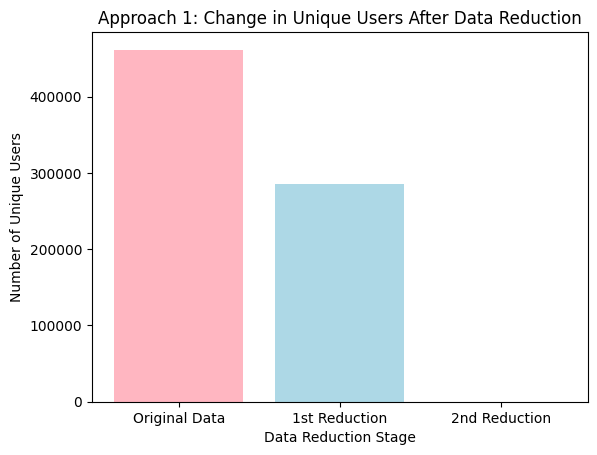

In [236]:
# plot the change in the number of unique users after two data reductions
num_users_original = merged_df['user_id'].nunique()
num_users_reduced_1 = reduced_df['user_id'].nunique()
num_users_reduced_2 = reduced_df2['user_id'].nunique()

x = ['Original Data', '1st Reduction', '2nd Reduction']
y = [num_users_original, num_users_reduced_1, num_users_reduced_2]

plt.bar(x, y, color=['lightpink', 'lightblue', 'purple'])
plt.xlabel('Data Reduction Stage')
plt.ylabel('Number of Unique Users')
plt.title('Approach 1: Change in Unique Users After Data Reduction')
plt.show()


In [237]:
#Show how many parent_asin rated 4 and less

ratings_count = reduced_df2.groupby('parent_asin').size()

filtered_ratings_count = ratings_count[(ratings_count == 1) | (ratings_count == 2) | (ratings_count == 3) | (ratings_count == 4)]

count_less_than_5_ratings = len(filtered_ratings_count)

print("Number of parent_asin values with less than 5 ratings:", count_less_than_5_ratings)


Number of parent_asin values with less than 5 ratings: 935


25% of reduced_df2 consists of parent_asin rated once or twice. This can lead to challenges in predicting some of the ratings

# **3.Data Initialization**


Filter out the data with ratings greater than **4**

In [238]:
reduced_data = merged_df[merged_df['average_rating'] > 4]
reduced_data


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True,...,470,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Life Nutrition,[],"{'Brand': 'Life Nutrition', 'Unit Count': '60 ...",NaN
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True,...,181,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Great for bathroom cleaning!', 'ur...",Evolve,[],"{'Brand': 'Evolve', 'Scent': 'Fresh,Lemon', 'P...",NaN
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True,...,8312,[Fizz your feet: Active bubble massage soothes...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'My opinion on this foot spa. ', 'u...",Homedics,[],"{'Use for': 'Feet', 'Power Source': 'Corded El...",NaN
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True,...,94,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Nature's Nutrition,[],"{'Brand': 'Nature's Nutrition', 'Unit Count': ...",NaN
5,5,Every home should have these,"I have never been big on vitamins, with the ex...",[],B09GBMG83Z,B09GBMG83Z,AFSKPY37N3C43SOI5IEXEK5JSIYA,2022-02-21 00:14:54.796,1,False,...,653,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Video Review Best Vitamin C 500 MG...,Carlyle,[],"{'Brand': 'Carlyle', 'Primary Supplement Type'...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494115,5,Foaming easily,Easy foaming and clean. I like it.,[],B07KXT7Y48,B07KXT7Y48,AEJPIZY7TF5HR6WQAXK77N2YL6ZA,2019-04-15 19:28:57.229,1,True,...,377,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Bath Scrubber Body Brush Shower Sc...,CJSJ,[],"{'Brand': 'CJSJ', 'Color': 'Blue', 'Power Sour...",NaN
494116,5,Best brush!,"Material is good. Worthy to buy.Firstly, the c...",[],B07KXT7Y48,B07KXT7Y48,AEQG5UEVYBNLWPXB3E2EODQ3EGSQ,2019-04-12 04:21:04.257,6,True,...,377,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Bath Scrubber Body Brush Shower Sc...,CJSJ,[],"{'Brand': 'CJSJ', 'Color': 'Blue', 'Power Sour...",NaN
494117,5,It makes my skin softer.,This brush is a good tool for cleaning and mas...,[],B07KXT7Y48,B07KXT7Y48,AGTVLNJAFZTKURBCHLUIH6VEOQCQ,2020-07-17 05:01:39.190,0,True,...,377,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Bath Scrubber Body Brush Shower Sc...,CJSJ,[],"{'Brand': 'CJSJ', 'Color': 'Blue', 'Power Sour...",NaN
494118,5,This brush is perfect !,"Honestly, the brush totally is 15inch. Maybe y...",[{'small_image_url': 'https://images-na.ssl-im...,B07KXT7Y48,B07KXT7Y48,AGMA5UN3JPLQLQZ2PFYHJYSC4PNA,2019-03-07 22:33:36.968,173,True,...,377,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Bath Scrubber Body Brush Shower Sc...,CJSJ,[],"{'Brand': 'CJSJ', 'Color': 'Blue', 'Power Sour...",NaN


In [239]:
reduced_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 288309 entries, 0 to 494119
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             288309 non-null  int64         
 1   title_x            288309 non-null  object        
 2   text               288309 non-null  object        
 3   images_x           288309 non-null  object        
 4   asin               288309 non-null  object        
 5   parent_asin        288309 non-null  object        
 6   user_id            288309 non-null  object        
 7   timestamp          288309 non-null  datetime64[ns]
 8   helpful_vote       288309 non-null  int64         
 9   verified_purchase  288309 non-null  bool          
 10  main_category      288309 non-null  object        
 11  title_y            288309 non-null  object        
 12  average_rating     288309 non-null  float64       
 13  rating_number      288309 non-null  int64        

In [240]:
#group the users
product_count_by_user = reduced_data.groupby('user_id').size()
product_count_by_user



,0
user_id,
AE222CDPBUOEJLIFR5X6KMP7YDFA,1
AE222HRNGARBTPMBFOETLSAGJMHA,1
AE222LBLDIVPM4XEAAVWPUAY54BA,1
AE223TLCV274EETT6YJJOJ4IMCZA,1
AE225P7FIMCUQD3TPAOF5LSGCLYQ,1
...,...
AHZZXJTF7F6A3NY2BV65DZ4ZHBRA,1
AHZZYNXDK6AGAKXKSBIYIMKVZ5ZQ,1
AHZZZCVRM3TP6MMKLO7EMMZWTMEQ,1


In [241]:
#sort them from biggest to smallest
product_count_by_user_sorted = product_count_by_user.sort_values(ascending=True)


In [242]:
# filter out any users that have rated less than 10 items
product_count_by_user_sorted_filtered = product_count_by_user_sorted[product_count_by_user_sorted > 10 ]



In [243]:
product_count_by_user_sorted_filtered


,0
user_id,
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,11
AGMWACNMAG74AXBF7IJ22IOZSZPA,11
AEHMQSTB6ESWFAT4AHROTV6M7VWA,11
AHIILRF3CJGYF3LXJSE4EVAIP7TA,11
AHX2B4DEER2QR3IU3CCNB3CWC6TA,11
...,...
AH3BXW7KLIS2VAE56UXJS2NS7I5A,32
AHPGHDFIU3BUB3RQBP56RQQA7W4Q,41
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,44


In [244]:
product_count_by_user_sorted_filtered_df = product_count_by_user_sorted_filtered.reset_index()
product_count_by_user_sorted_filtered_df.columns = ['user_id', 'count']

product_count_by_user_sorted_filtered_df


,user_id,count
0,AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,11
1,AGMWACNMAG74AXBF7IJ22IOZSZPA,11
2,AEHMQSTB6ESWFAT4AHROTV6M7VWA,11
3,AHIILRF3CJGYF3LXJSE4EVAIP7TA,11
4,AHX2B4DEER2QR3IU3CCNB3CWC6TA,11
...,...,...
62,AH3BXW7KLIS2VAE56UXJS2NS7I5A,32
63,AHPGHDFIU3BUB3RQBP56RQQA7W4Q,41
64,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,44
65,AEYVPPWR4CIKWX4BGYKCBCDL2CZQ,62


The user IDs and the ratings that have been removed to form the final matrix reduced_data


In [245]:
reduced_data = reduced_data[reduced_data['user_id'].isin(product_count_by_user_sorted_filtered_df['user_id'])]
reduced_data


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
63,5,Easy to Read Display,I have high blood pressure. I have a wrist mon...,[],B0B9121DFX,B0B9121DFX,AHV6QCNBJNSGLATP56JAWJ3C4G2A,2022-09-24 20:20:55.583,0,False,...,27,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Solid unit with history and option...,ANTROLIFE,[],"{'Date First Available': 'August 11, 2022', 'M...",NaN
66,4,Helpful!,I am just getting over the worst hemorrhoids o...,[],B08XXC2L7D,B08XXC2L7D,AHV6QCNBJNSGLATP56JAWJ3C4G2A,2021-05-20 21:50:23.498,6,False,...,170,[],"[How to Use:, 1. Place Yoni steam seat over to...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],AOBBT,[],"{'Brand': 'AOBBT', 'Material': 'Polypropylene'...",NaN
69,4,Thin But Soft,Our guest room doesn't get very dark because o...,[],B08DL9SL59,B08DL9SL59,AHV6QCNBJNSGLATP56JAWJ3C4G2A,2021-01-23 17:11:24.608,0,False,...,44,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],MAD Beauty,[],"{'Brand': 'MAD Beauty', 'Age Range (Descriptio...",NaN
70,4,Great Gift Idea,This is a nice basket of bath bombs. The baske...,[],B08LGK1DB2,B08LGK1DB2,AHV6QCNBJNSGLATP56JAWJ3C4G2A,2021-01-18 22:23:52.525,0,False,...,27,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Vibrant colors and aromatic', 'url...",Joanne Arden Organics,[],"{'Brand': 'Joanne Arden Organics', 'Product Be...",NaN
71,4,Comfortable,These masks are comfortable to wear. The mater...,[],B08GBHLJPP,B08GBHLJPP,AHV6QCNBJNSGLATP56JAWJ3C4G2A,2020-10-01 18:55:46.392,0,False,...,32,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Colosseum,[],"{'Brand': 'Colosseum', 'Material': 'Cotton', '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477473,5,Good stuff!,Great sticky wax and safe for the environment!!!,[],B079RJSV8D,B079RJSV8D,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2018-10-27 23:22:42.173,1,True,...,23,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],HXMLS,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
477474,5,Great wax!,Great surfboard wax and it's not petroleum bas...,[],B079RJT3RN,B079RJT3RN,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2021-11-23 23:21:54.720,0,True,...,26,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",16.95,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST review of the Sticky Bumps ...,Matuna's,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
477475,5,Good stuff!,Great sticky wax and safe for the environment!!!,[],B079RJSV8D,B079RJSV8D,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2018-10-27 23:22:42.173,1,True,...,23,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],HXMLS,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
477476,5,Great wax!,Great surfboard wax and it's not petroleum bas...,[],B079RJT3RN,B079RJT3RN,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,2021-11-23 23:21:54.720,0,True,...,26,"[Ditch the chemicals, and enjoy the waves with...","[Matunas is the original, all organic surf wax...",16.95,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'HONEST review of the Sticky Bumps ...,Matuna's,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN


In [246]:
# reduced_data.to_csv('reduced_data.csv')
# files.download('reduced_data.csv')

<!-- **We** are only interested in the average_ratings,the user_id, and the parent_asin to form our user-item matrix. All other columns were removed. -->


In [247]:
reduced_data2 = reduced_data[['average_rating', 'user_id', 'parent_asin']]

reduced_data2


,average_rating,user_id,parent_asin
63,4.5,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B0B9121DFX
66,4.4,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08XXC2L7D
69,4.3,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08DL9SL59
70,4.3,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08LGK1DB2
71,4.3,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08GBHLJPP
...,...,...,...
477473,4.8,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJSV8D
477474,4.7,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJT3RN
477475,4.8,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJSV8D
477476,4.7,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJT3RN


In [248]:
# reduced_data2.to_csv('average_rating_userid_parent_asin.csv')
# files.download('average_rating_userid_parent_asin.csv')

In [249]:
test_matrix = reduced_data2.pivot_table(index='parent_asin', columns='user_id', values='average_rating')
# Fill missing values with zeros
test_matrix = test_matrix.fillna(0)
test_matrix



user_id,AE2O2C43KTYO4LXXGZWJZLE67GBQ,AE5IMGWRBJA7JQFBQTBK25HDYGVA,AEAXAJACFMXIAAH4WOHRMXPSZWFA,AEC6IZVI2NGFBCIYVD4X5MDGB6DQ_1,AEC6IZVI2NGFBCIYVD4X5MDGB6DQ_2,AECOPBDL3PHOESNB2RXKPZSXGBOA,AECUQNTYGADM6XKCDKWEJPDQGNVQ,AEHMQSTB6ESWFAT4AHROTV6M7VWA,AEHWKRPNWNMOAJSMO2F6O7RFRTNA,AEIW7GMVHQ4HBUXTTYEMHEMADUMQ,...,AHMG3ALUBE3FEBHODTBHP5J24YDA,AHOFNQHMKWRZQRBRYSCN2NFWGEZA,AHPGHDFIU3BUB3RQBP56RQQA7W4Q,AHPR3DAGWZHHNZW2LBMTXU3PLSLQ,AHR4NVRGPOS6GIJ3O4WQ3D4KUKRA,AHUOOO3WCQNZA4MQPWHAOEUEQ4YQ,AHV6QCNBJNSGLATP56JAWJ3C4G2A,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,AHX2B4DEER2QR3IU3CCNB3CWC6TA,AHY2TURQPNIDXZGH2CMQLZ343YMQ
parent_asin,,,,,,,,,,,,,,,,,,,,,
B00009QJW6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000CJA3YW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000F95A4W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001HLJB3S,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B002K3APZ0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0BQ47DNW2,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.8,0.0,0.0,0.0,0.0,0.0,0.0
B0BQ6SBNZR,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0BSRPX53Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
rating_data = reduced_data2[['user_id', 'parent_asin', 'average_rating']]
rating_data = pd.DataFrame(rating_data)
rating_data



,user_id,parent_asin,average_rating
63,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B0B9121DFX,4.5
66,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08XXC2L7D,4.4
69,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08DL9SL59,4.3
70,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08LGK1DB2,4.3
71,AHV6QCNBJNSGLATP56JAWJ3C4G2A,B08GBHLJPP,4.3
...,...,...,...
477473,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJSV8D,4.8
477474,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJT3RN,4.7
477475,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJSV8D,4.8
477476,AHWNVVDSGYT5QSHUAQB7L7O2V3PQ,B079RJT3RN,4.7


In [251]:
# rating_data.to_csv('rating_data.csv')
# files.download('rating_data.csv')

# **4.Using Machine Learning Algorithm KNN to calculate the RMSE**

In [252]:
from surprise.model_selection import train_test_split


In [253]:
#Reading the dataset

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(rating_data,reader)



In [254]:
x, y = train_test_split(dataset, test_size=0.3,random_state=10)


In [255]:
KNN = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
KNN.fit(x)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [256]:
predicted_test = KNN.test(y)

In [257]:
predicted_test

[Prediction(uid='AES3YWD3ONJOUDRWFIV2ZO44QDAQ', iid='B09BBQS244', r_ui=4.1, est=4.1, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AH5PGJYVXBFVRXAFSTA7AEH4EXRQ', iid='B07QD2XFNV', r_ui=4.3, est=4.395706214689266, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AFVOZ4UNUZKEQ7GTQ3IHQY7PZ5FA_1', iid='B09YXQBH6Y', r_ui=4.4, est=4.395706214689266, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AG73BVBKUOH22USSFJA5ZWL7AKXA', iid='B0741GG1KF', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AG63W2BMC4HRP76AMS36AYY64AHA', iid='B08ZHHLHSP', r_ui=4.7, est=4.7, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AEOK4TQIKGO23SJKZ6PW4FETNNDA_1', iid='B08WLVHMPJ', r_ui=4.2, est=4.2, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AHGQDSOBAIVAAKJFIVEGS344MSXA', iid='B0BDM8DHM4', r_ui=4.4, est=4.395706214689266, det

In [258]:
print("Item- Model : Test Set")
accuracy.rmse(predicted_test, verbose=True)


Item- Model : Test Set
RMSE: 0.1517


0.15170842746106702

In [259]:

import random

# Get a list of unique user IDs
user_ids = rating_data['user_id'].unique()

# Pick 4 random user IDs without replacement
random_users = random.sample(list(user_ids), 4)

# Print the randomly selected users
random_users


['AFXF3EGQTQDXMRLDWFU7UBFQZB7Q',
 'AHV6QCNBJNSGLATP56JAWJ3C4G2A',
 'AEC6IZVI2NGFBCIYVD4X5MDGB6DQ_2',
 'AECOPBDL3PHOESNB2RXKPZSXGBOA']

# **5.Collaborative Filtering: Recommending More than one Item for targeted user**

> Add blockquote



Here, we're trying to implement item-item collaborative filtering to recommend items for a specific targetted user we've assigned

In [260]:

import pandas as pd


# Create a DataFrame from the prediction results
predictions_df = pd.DataFrame(predicted_test, columns=['uid', 'iid', 'rui', 'est', 'details'])

# Sort the predictions by estimated rating in descending order
predictions_df_sorted = predictions_df.sort_values(by='est', ascending=False)

# Get the users with the highest predicted ratings
top_users = predictions_df_sorted.groupby('uid').head(1) # Get the top predicted item for each user

# Display the result
print(top_users[['uid', 'iid', 'est']])


                                uid         iid       est
60   AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B095JXWBPS  5.000000
3      AG73BVBKUOH22USSFJA5ZWL7AKXA  B0741GG1KF  5.000000
369    AGFHZOVGXHPFTP23A2ZWMQ72ODLQ  B0741GG1KF  5.000000
292    AGQXRXHIEUGJU6KNUPNWMXYBRREA  B0741GG1KF  5.000000
137    AFGCJIO7DNVCCZPG4KVMKKXVPJLQ  B01MYXNLTI  4.900000
..                              ...         ...       ...
250    AHBE7NQAPR7F7FSXPHT2JQOX3IYA  B087CCD82N  4.395706
109    AES3YWD3ONJOUDRWFIV2ZO44QDAQ  B095VK1LNP  4.395706
115    AH5PGJYVXBFVRXAFSTA7AEH4EXRQ  B09L7VTFWJ  4.395706
6      AHGQDSOBAIVAAKJFIVEGS344MSXA  B0BDM8DHM4  4.395706
152    AE5IMGWRBJA7JQFBQTBK25HDYGVA  B0BQ6SBNZR  4.395706

[67 rows x 3 columns]


In [261]:
print(top_users.nlargest(10, 'est'))


                                uid         iid  rui  est  \
60   AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B095JXWBPS  5.0  5.0   
3      AG73BVBKUOH22USSFJA5ZWL7AKXA  B0741GG1KF  5.0  5.0   
369    AGFHZOVGXHPFTP23A2ZWMQ72ODLQ  B0741GG1KF  5.0  5.0   
292    AGQXRXHIEUGJU6KNUPNWMXYBRREA  B0741GG1KF  5.0  5.0   
137    AFGCJIO7DNVCCZPG4KVMKKXVPJLQ  B01MYXNLTI  4.9  4.9   
156    AHDVSLWHSORYGG3S5QZMVDFNOXUQ  B08F18N3QQ  4.9  4.9   
262    AHWNVVDSGYT5QSHUAQB7L7O2V3PQ  B079RJSV8D  4.8  4.8   
222    AFJBKPK5W56XWSNPQU2WW66ISWYQ  B09C4SPQVR  4.8  4.8   
244    AEHMQSTB6ESWFAT4AHROTV6M7VWA  B07YXCZY61  4.8  4.8   
140  AEC6IZVI2NGFBCIYVD4X5MDGB6DQ_2  B08PHS3QVP  4.8  4.8   

                                      details  
60   {'actual_k': 5, 'was_impossible': False}  
3    {'actual_k': 0, 'was_impossible': False}  
369  {'actual_k': 0, 'was_impossible': False}  
292  {'actual_k': 1, 'was_impossible': False}  
137  {'actual_k': 0, 'was_impossible': False}  
156  {'actual_k': 5, 'was_impossible': F

In [262]:
target_user = 'AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1'
# AHDVSLWHSORYGG3S5QZMVDFNOXUQ

In [263]:
target_user_ratings = rating_data[rating_data['user_id'] == target_user]
print(target_user_ratings)


                               user_id parent_asin  average_rating
179222  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B09GL3RDTD             4.1
179224  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B0B3MBVNDG             4.3
179225  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B0B3MBVNDG             4.3
179227  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B08WWWDBJK             4.3
179230  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B095JXWBPS             5.0
...                                ...         ...             ...
412838  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B086Z1X3VR             4.3
412839  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B08FCSKHL1             4.2
412840  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B07ND6RJWR             4.6
412841  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B07ZJQ7FHN             4.8
412842  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B0839PXB6S             4.3

[73 rows x 3 columns]


In [264]:
target_user_rated_items = target_user_ratings['parent_asin'].tolist()

target_user_rated_items_names = []

for item_id in target_user_rated_items:
  item_name = df_meta[df_meta['parent_asin'] == item_id]['title'].values[0]
  target_user_rated_items_names.append(item_name)

print(f"Items rated by user {target_user}:")

for item_name in target_user_rated_items_names:
  print(f"\t- {item_name}")



Items rated by user AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1:
	- NatureWorks HydroMATE Electrolytes Powder Packets Hydration Accelerator Drink Mix Rapid Party Relief Recovery Vitamin C Orange Citrus 30 Count
	- JYM Supplement Science Plant Jym Oatmeal Cookie, 2 Lb, Oatmeal Cookie, 2 Pound
	- JYM Supplement Science Plant Jym Oatmeal Cookie, 2 Lb, Oatmeal Cookie, 2 Pound
	- Univera I'MMUNE Aloe Vera 3-in-1 Immune Boost Jelly Stick, Clinically Proven for Immune Support, Digestive, Skin Health, 200:1 Aloe Concentration Supplement, 1 PK, 14 Sticks, Green Grape Apple
	- Gua Sha Facial Tool, Rose Quartz Facial Tool for Scraping and SPA Acupuncture Therapy, Pink Crystal Stone for Facial Body Skin for SPA Acupuncture Therapy Trigger Point Treatment(1PCS)
	- TINA&TONY Microfiber Spray Mop Replacement Heads 16.5", Washable Floor Cleaning Pads for Wet/Dry Dust Mops Head Refills Pads Compatible with Bona Floor Care for Kitchen Home Floor Cleaning, 3 Pack
	- LIFEWORTH Full Spectrum EAA &BCAA 2:1:1 Essential A

In [265]:
target_user_rated_items = target_user_ratings['parent_asin'].tolist()


In [266]:
# Create a list to store the raw neighbors and their predicted ratings
neighbor_ratings = []

# Iterate through the target user's rated items
for item in target_user_rated_items:
    try:
        inner_id = KNN.trainset.to_inner_iid(item)
        neighbors = KNN.get_neighbors(inner_id, k=10)
        raw_neighbors = [KNN.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

        # Predict ratings for the neighbors
        for neighbor in raw_neighbors:
            predicted_rating = KNN.predict(target_user, neighbor)
            neighbor_ratings.append([neighbor, predicted_rating.est])  # Store item, neighbor, and predicted rating

    except ValueError:
        print(f"Item {item} not found in the training set.")

neighbor_ratings = list(set(tuple(x) for x in neighbor_ratings))
neighbor_ratings = [list(x) for x in neighbor_ratings]


Item B08RB57JS1 not found in the training set.
Item B08RB57JS1 not found in the training set.
Item B08RB57JS1 not found in the training set.


In [267]:
neighbor_ratings

[['B082SJT4WN', 4.1],
 ['B07XVVVB8W', 4.2],
 ['B089KWBLBQ', 4.3],
 ['B08XG3Z3T1', 4.5],
 ['B09D5P75MN', 4.300000000000002],
 ['B08GJXJ7T5', 4.5],
 ['B0BPBNG5RF', 4.1],
 ['B07TLWP6YT', 4.6],
 ['B093ZBSBP2', 4.200000000000002],
 ['B09LXHFGRN', 4.2],
 ['B09G6CG5S4', 4.300000000000002],
 ['B00STSUPCS', 4.400000000000002],
 ['B08KFLJCYG', 4.6],
 ['B086VRS6KZ', 4.4],
 ['B06XWW6QZG', 4.100000000000001],
 ['B0794698Z1', 4.2],
 ['B095JXWBPS', 5],
 ['B093GTXZ52', 4.2],
 ['B08FXLZQSP', 4.4],
 ['B07ZJQ7FHN', 4.8],
 ['B09239CCS7', 4.400000000000002],
 ['B07VY7HB21', 4.1],
 ['B079WQ5B5Z', 4.100000000000001],
 ['B08SVZVLMX', 4.5],
 ['B08WWWDBJK', 4.3],
 ['B08NC99WBZ', 4.6],
 ['B0B3MBVNDG', 4.3],
 ['B08FCSKHL1', 4.2],
 ['B0839PXB6S', 4.3],
 ['B08HX74JH6', 4.1],
 ['B07NZYCZB2', 4.1],
 ['B07R3SKKQP', 4.3],
 ['B07PGJR2YC', 4.4],
 ['B08K2K54BK', 4.1],
 ['B086Z1X3VR', 4.3],
 ['B081F2V7NM', 4.4],
 ['B07GHG9P9P', 4.400000000000002],
 ['B0BCKKMSRJ', 4.1],
 ['B09JZ59ZKK', 4.4],
 ['B07JQC4QYH', 4.10000000000000

We cant really get the RMSE for this because the RMSE requires us to compare between the original ratings and the predicted ratings. In this case, the original ratings dont exist, since we are trying to find items that the user has NOT YET rated and see if we can recommend them.

# **6. Understanding the Recommended Data**

In [268]:
def get_item_names(recommended_items, item_metadata):
  item_names = []
  for items in recommended_items:
    item_id = items[0]
    rating = items[1]
    item_name = item_metadata[item_metadata['parent_asin'] == item_id]['title'].values[0]
    item_names.append((item_id, item_name))

  return item_names

item_names = get_item_names(neighbor_ratings, df_meta)

for item_id, item_name in item_names:
  print(f"Item ID: {item_id}, Item Name: {item_name}")


Item ID: B082SJT4WN, Item Name: QIELIZI Pill Box and Pill Organizer with Lanyard,Large AM PM Medicine Pill Case 7 Day Travel Pills Box Daily Vitamin Container Fish Oil Holder (Colorful Flower Set)
Item ID: B07XVVVB8W, Item Name: Super Organics Amla (Amalaki) Powder | Organic Superfood Powder | Raw Superfoods | Whole Food Supplement | Good Vitamin C Content – Vegan, Non-GMO & Gluten-Free, 8 oz
Item ID: B089KWBLBQ, Item Name: Evogen Greentein | Pure Grain Free Plant Protein, Pea, Pumpkin, Watermelon Seed Proteins Vitamin B12, Dairy Free, Gluten Free, for Recovery and Shakes (Dark Chocolate Hazelnut)
Item ID: B08XG3Z3T1, Item Name: FeelGood Organic Superfoods Maca Root Powder, Vegan, Non-GMO, Keto, Sourced from Peru for Maca Tea Lattes, 7 oz
Item ID: B09D5P75MN, Item Name: Westside Barbell Smelling Salts, Ammonia Inhalant for Athletes, Weight Lifting, Power Lifting, Increase Focus and Alertness (2 Oz, 3 Pack)
Item ID: B08GJXJ7T5, Item Name: Aggressive Labz Behemoth Creatine Power Plexx - 

print the original items the target_user has rated. the point of this is to compare the items the user has originally rated with the items they got recommended at the very end, and see if there's any similarities in the items based on there titles.


In [269]:
target_user_ratings = rating_data[rating_data['user_id'] == target_user]
print(target_user_ratings)


                               user_id parent_asin  average_rating
179222  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B09GL3RDTD             4.1
179224  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B0B3MBVNDG             4.3
179225  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B0B3MBVNDG             4.3
179227  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B08WWWDBJK             4.3
179230  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B095JXWBPS             5.0
...                                ...         ...             ...
412838  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B086Z1X3VR             4.3
412839  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B08FCSKHL1             4.2
412840  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B07ND6RJWR             4.6
412841  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B07ZJQ7FHN             4.8
412842  AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1  B0839PXB6S             4.3

[73 rows x 3 columns]


In [270]:
target_user_rated_items = target_user_ratings['parent_asin'].tolist()

target_user_rated_items_names = []

for item_id in target_user_rated_items:
  item_name = df_meta[df_meta['parent_asin'] == item_id]['title'].values[0]
  target_user_rated_items_names.append(item_name)

print(f"Items rated by user {target_user}:")

for item_name in target_user_rated_items_names:
  print(f"\t- {item_name}")




Items rated by user AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1:
	- NatureWorks HydroMATE Electrolytes Powder Packets Hydration Accelerator Drink Mix Rapid Party Relief Recovery Vitamin C Orange Citrus 30 Count
	- JYM Supplement Science Plant Jym Oatmeal Cookie, 2 Lb, Oatmeal Cookie, 2 Pound
	- JYM Supplement Science Plant Jym Oatmeal Cookie, 2 Lb, Oatmeal Cookie, 2 Pound
	- Univera I'MMUNE Aloe Vera 3-in-1 Immune Boost Jelly Stick, Clinically Proven for Immune Support, Digestive, Skin Health, 200:1 Aloe Concentration Supplement, 1 PK, 14 Sticks, Green Grape Apple
	- Gua Sha Facial Tool, Rose Quartz Facial Tool for Scraping and SPA Acupuncture Therapy, Pink Crystal Stone for Facial Body Skin for SPA Acupuncture Therapy Trigger Point Treatment(1PCS)
	- TINA&TONY Microfiber Spray Mop Replacement Heads 16.5", Washable Floor Cleaning Pads for Wet/Dry Dust Mops Head Refills Pads Compatible with Bona Floor Care for Kitchen Home Floor Cleaning, 3 Pack
	- LIFEWORTH Full Spectrum EAA &BCAA 2:1:1 Essential A

by reading the list of recommended items and the list of purchased items, there is a lot of similarity between the recommended items and the items the user has purchased in the past.

Some observations:
1. the user is most likely woman, based on the items that have been purchased.
2. Both recommended items and purchased items have the same categories, shampoos, women's vitamens and gummies, skincare, house cleaning supplies, etc..., meaning our recommendation system is working greatly.

In [271]:
#extracting the data in the form of csv file
import csv

with open('recommended_items2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['user_id', 'recommended_item', 'predicted_rating'])

    for item, predicted_rating in item_names:
        writer.writerow([target_user, item, predicted_rating])
